# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
c = 0
cityid = []
foundcities = []
lat = []
lon = []
tempmax = []
humidity = []
cloudiness = []
country = []
date = []
windspeed = []

for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        #pprint(response)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        tempmax.append(response['main']['temp_max'])
        foundcities.append(city)
        cityid.append(response['id'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        id = response['id']
        c = c+1
        print(f"Processing Record {c} | {id}: {city}")
    except:
        print(f"Skipping: {city} not found")
        pass
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")


Processing Record 1 | 6165406: thompson
Processing Record 2 | 6089245: norman wells
Processing Record 3 | 4030556: rikitea
Processing Record 4 | 546105: nikolskoye
Processing Record 5 | 2136825: isangel
Processing Record 6 | 975436: mmabatho
Processing Record 7 | 3450288: santa cruz cabralia
Processing Record 8 | 2126123: chokurdakh
Processing Record 9 | 6201424: mataura
Processing Record 10 | 2074865: carnarvon
Processing Record 11 | 2017155: saskylakh
Processing Record 12 | 4020109: atuona
Processing Record 13 | 3833367: ushuaia
Processing Record 14 | 5122534: jamestown
Processing Record 15 | 100926: umm lajj
Processing Record 16 | 3471451: arraial do cabo
Processing Record 17 | 3430863: mar del plata
Processing Record 18 | 5546220: saint george
Processing Record 19 | 3831208: qaanaaq
Processing Record 20 | 2075265: busselton
Skipping: fort saint john not found
Processing Record 21 | 935215: saint-philippe
Processing Record 22 | 2171099: codrington
Processing Record 23 | 964432: port

Processing Record 185 | 3698359: chicama
Processing Record 186 | 2014624: udachnyy
Processing Record 187 | 3474574: palmas
Processing Record 188 | 146214: pafos
Processing Record 189 | 1645528: denpasar
Processing Record 190 | 317106: denizli
Processing Record 191 | 1730802: andili
Processing Record 192 | 4726521: san patricio
Processing Record 193 | 1691538: romblon
Processing Record 194 | 2409914: bonthe
Processing Record 195 | 1687894: santa rosa
Processing Record 196 | 2152659: port macquarie
Processing Record 197 | 2098329: daru
Processing Record 198 | 2181625: te anau
Processing Record 199 | 2139521: noumea
Processing Record 200 | 3393536: olinda
Processing Record 201 | 107304: buraydah
Processing Record 202 | 343292: asosa
Processing Record 203 | 3347353: menongue
Processing Record 204 | 2120048: ust-nera
Processing Record 205 | 1852357: shimoda
Processing Record 206 | 2092164: lorengau
Processing Record 207 | 2194098: ahipara
Skipping: solovetskiy not found
Skipping: daxian not

Processing Record 365 | 3466165: cidreira
Processing Record 366 | 4269392: chanute
Processing Record 367 | 1855342: nishihara
Processing Record 368 | 3893629: coquimbo
Processing Record 369 | 3846915: libertador general san martin
Skipping: addi ugri not found
Processing Record 370 | 2986626: plouzane
Processing Record 371 | 324190: alanya
Processing Record 372 | 1519924: kushmurun
Processing Record 373 | 2299349: konongo
Processing Record 374 | 3899539: antofagasta
Processing Record 375 | 2013639: verkhnevilyuysk
Processing Record 376 | 3421193: paamiut
Processing Record 377 | 1512019: aksarka
Processing Record 378 | 925498: mzimba
Processing Record 379 | 5374920: morro bay
Skipping: louisbourg not found
Processing Record 380 | 2377457: nouadhibou
Processing Record 381 | 939676: willowmore
Processing Record 382 | 3466980: caravelas
Processing Record 383 | 2288105: grand-lahou
Processing Record 384 | 1624725: tarakan
Processing Record 385 | 935214: saint-pierre
Processing Record 386 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_dict = pd.DataFrame({
                "City_ID": cityid,
                "City": foundcities,
                "Country": country,
                "Date": date,
                "Lat": lat,
                "Lng": lon,
                "Max Temp": tempmax,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": windspeed
                })

output_path = os.path.join("..","output_data","cities.csv")
city_dict.to_csv(output_path, index=False, header=True)

In [6]:
city_data = pd.read_csv("../output_data/cities.csv")
city_data = city_data.dropna()
len(city_data)

544

In [7]:
city_data.describe()

,City_ID,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,5.440000e+02,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,2.678242e+06,1.644100e+09,19.507420,18.626000,50.078621,73.744485,55.722426,8.516967
std,1.700710e+06,2.014468e+02,32.976067,89.009902,30.616164,20.257163,40.264162,6.427479
min,5.365400e+04,1.644099e+09,-54.800000,-175.200000,-41.010000,7.000000,0.000000,0.000000
25%,1.505421e+06,1.644100e+09,-8.135600,-57.638750,30.482500,63.000000,13.000000,3.477500
50%,2.200518e+06,1.644100e+09,23.066150,23.514500,61.330000,78.000000,65.500000,6.910000
75%,3.662568e+06,1.644100e+09,46.757450,97.163025,75.260000,88.000000,99.000000,11.610000
max,1.072286e+07,1.644100e+09,78.218600,179.316700,90.140000,100.000000,100.000000,37.020000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_data.loc[city_data["Humidity"] > 100]

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_data = city_data.drop(city_data.loc[city_data["Humidity"]>100].index, inplace = False)
clean_data.head()  

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,6165406,thompson,CA,1644099168,55.7435,-97.8558,-7.47,86,100,4.74
1,6089245,norman wells,CA,1644099169,65.2820,-126.8329,-3.51,90,97,6.85
2,4030556,rikitea,PF,1644099750,-23.1203,-134.9692,79.09,73,96,10.54
3,546105,nikolskoye,RU,1644098988,59.7035,30.7861,26.87,95,100,8.19
4,2136825,isangel,VU,1644099162,-19.5500,169.2667,82.51,89,75,9.22


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs (or svgs)

## Latitude vs. Temperature Plot

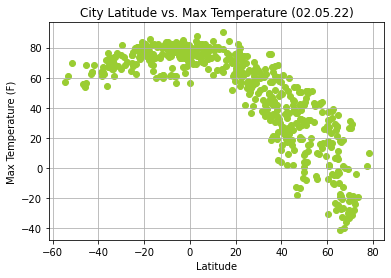

In [37]:
plt.scatter(clean_data["Lat"], clean_data["Max Temp"], c = "yellowgreen")
plt.title("City Latitude vs. Max Temperature (02.05.22)")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../Images/Lat_vs_Temp.png")
plt.show()

OBSERVATION

The chart above is showing that the closer you are to the equator, the higher the max temperature results are. On the other hand, in February of 2022, the lower the latitude was, the higher the temperature. 

## Latitude vs. Humidity Plot

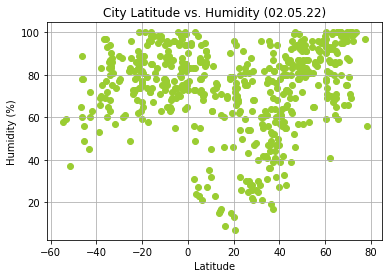

In [38]:
plt.scatter(clean_data["Lat"], clean_data["Humidity"], c="yellowgreen")
plt.title("City Latitude vs. Humidity (02.05.22)")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../Images/Lat_vs_Humidity.png")
plt.show()

OBSERVATION

The latitude vs humidity plot does not really show much of a correlation. Besides the citys that are located where the latitude is 20, there is a larger range of humidity in the data.

## Latitude vs. Cloudiness Plot

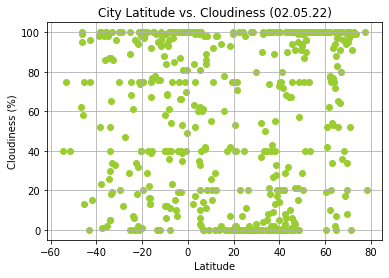

In [39]:
plt.scatter(clean_data["Lat"], clean_data["Cloudiness"],c="yellowgreen")
plt.title("City Latitude vs. Cloudiness (02.05.22)")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../Images/Lat_vs_Cloudiness.png")
plt.show()

OBSERVATION

This scatter plot shows that there were several cities throughout the world showing high cloudiness percentages, as well as a large section that was also experiencing 0% cloudiness. Overall, this chart is also very scattered in regards to cloudiness levels throughout the world.

## Latitude vs. Wind Speed Plot

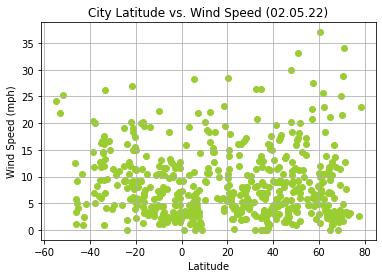

In [40]:
plt.scatter(clean_data["Lat"], clean_data["Wind Speed"], c = "yellowgreen")
plt.title("City Latitude vs. Wind Speed (02.05.22)")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../Images/Lat_vs_WindSpeed.png")
plt.show()

OBSERVATION

This scatter plot shows that most of the cities were experiencing wind speeds between 0 and 20mph. A few locations were also showing wind speeds higher than 20mph.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 
The r-value is: -0.8487400346320747
 


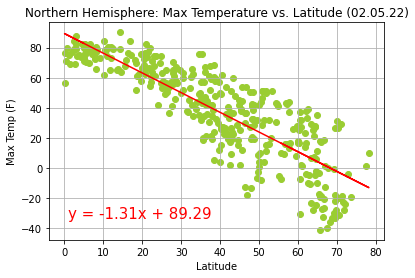

In [41]:
north_temp_data = clean_data.loc[clean_data["Lat"] >= 0]

x_values = north_temp_data["Lat"]
y_values = north_temp_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

plt.scatter(x_values,y_values,c="yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-33),fontsize=15,color="red")
plt.title("Northern Hemisphere: Max Temperature vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

plt.savefig("../Images/North_Lat_vs_Temp.png")
plt.show()

OBSERVATION

This linear regression shows that the higher the latitude is in the Northern Hemisphere, the lower the temperature reads.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 
The r-value is: 0.5278257364589336
 


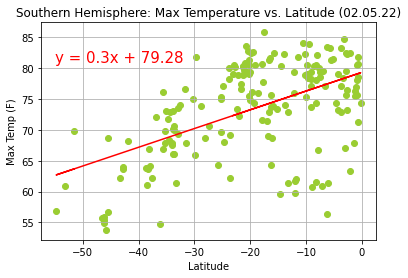

In [42]:
south_temp_data = clean_data.loc[clean_data["Lat"] < 0]

x_values = south_temp_data["Lat"]
y_values = south_temp_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
                                     
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

plt.scatter(x_values,y_values, color="yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,81),fontsize=15,color="red")
plt.title("Southern Hemisphere: Max Temperature vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

plt.savefig("../Images/South_Lat_vs_Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 
The r-value is: 0.3859876549787956
 


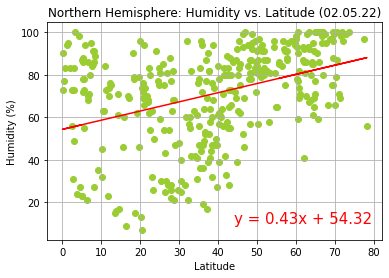

In [43]:
north_humid_data = clean_data.loc[clean_data["Lat"] >= 0]

x_values = north_humid_data["Lat"]
y_values = north_humid_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

plt.scatter(x_values,y_values, color = "yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(44,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Humidity vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../Images/North_Lat_vs_Humidity.png")
plt.show()

OBSERVATION

In the Northern Hemisphere, the humidity seems to slightly increase as the location of the city (in regards to the latitude) increases. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 
The r-value is: 0.3598561684011253
 


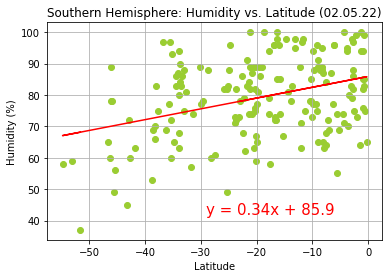

In [50]:
south_humid_data = clean_data.loc[clean_data["Lat"] < 0]

x_values = south_humid_data["Lat"]
y_values = south_humid_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept

print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-29,42),fontsize=15,color="red")
plt.title("Southern Hemisphere: Humidity vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../Images/South_Lat_vs_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 
The r-value is: 0.29751242192429445
 


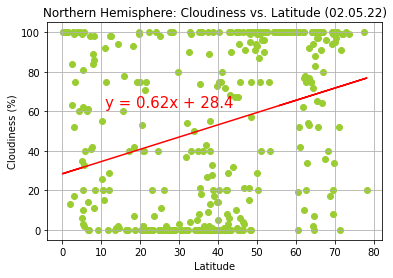

In [52]:
north_cloudi_data = clean_data.loc[clean_data["Lat"] >= 0]

x_values = north_cloudi_data["Lat"]
y_values = north_cloudi_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept

print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(11,62),fontsize=15,color="red")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../Images/North_Lat_vs_Cloudiness.png")
plt.show()

OBSERVATION

This chart sucks. 

This scatter plot may not show the best representation for collecting data as it has a large range. There is however a small positive correlation. The higher the latitude, the higher the percentage is for cloudiness in those cities.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 
The r-value is: 0.07574904111827699
 


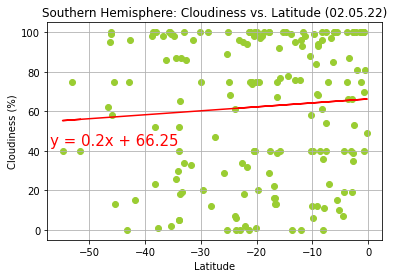

In [58]:
south_cloudi_data = clean_data.loc[clean_data["Lat"] < 0]

x_values = south_cloudi_data["Lat"]
y_values = south_cloudi_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept

print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,43),fontsize=15,color="red")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../Images/South_Lat_vs_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 
The r-value is: 0.06615859344916282
 


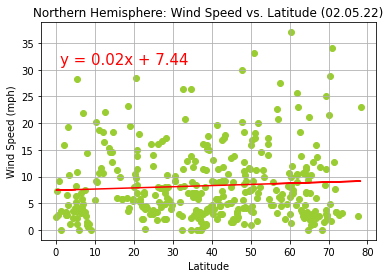

In [62]:
north_wind_data = clean_data.loc[clean_data["Lat"] >= 0]

x_values = north_wind_data["Lat"]
y_values = north_wind_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept

print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,31),fontsize=15,color="red")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../Images/North_Lat_vs_WindSpeed.png")
plt.show()

OBSERVATION:

In the Northern Hemisphere, the wind speed was around 0-15mph for the most part on February 5. There is a slight positive correlation and no location was showing wind speeds higher than 40mph. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 
The r-value is: -0.330058031157871
 


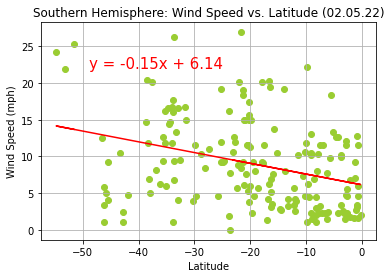

In [68]:
south_wind_data = clean_data.loc[clean_data["Lat"] < 0]

x_values = south_wind_data["Lat"]
y_values = south_wind_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(" ")
print(f"The r-value is: {rvalue}")
print(" ")

plt.scatter(x_values,y_values, c="yellowgreen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-49,22),fontsize=15,color="red")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude (02.05.22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../Images/South_Lat_vs_WindSpeed.png")
plt.show()